<a href="https://colab.research.google.com/github/ShanBore/Patient-Healthcare-Analysis/blob/main/Emr_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the emr dataset.
df = pd.read_csv('/content/emr_data.csv')

df.head()

,Patient ID,Age,Gender,Race,Primary Diagnosis,Secondary Diagnosis 1,Secondary Diagnosis 2,Medication,Procedure Code,Visit Date,...,Length of Stay,Insurance Type,Physician ID,Hospital Department,Source System,Blood Pressure,Heart Rate,Temperature,Blood Glucose,Cholesterol
0,6084c3f0-2355-469e-a16b-0f4c0cdba816,49,Male,White,M54.5,R10.9,NaN,Fluticasone,71020,2023-07-04,...,0,Medicare,b9a5cb83-b4df-4b4e-acce-25f203c8a286,Pediatrics,System A,103/71,71,97.8,85,161
1,86103326-d470-44fe-9e04-006f46099cf9,51,Male,White,M54.5,NaN,NaN,Metformin,93000,2023-01-18,...,9,Medicaid,3c914582-0ad3-4c82-9fd1-d51cba13f635,Cardiology,System B,93/89,76,99.0,94,138
2,95a8493a-1e9e-48f3-b93a-427bd3905219,57,Male,Other,E11.9,NaN,NaN,Metformin,99214,2023-09-08,...,0,Private,d5ae8b1b-da69-4306-a963-11b426102a10,Cardiology,System C,91/83,52,98.8,103,261
3,bd745f2b-bb7c-42d8-bc00-77277033ed06,60,Male,Asian,J06.9,E11.9,NaN,Amlodipine,73630,2024-04-08,...,1,Medicare,ff555eb4-0bd2-4449-bce0-c6844495dbc9,ER,System A,101/76,69,97.6,138,120
4,e28f5d5a-cd46-4f7a-86d9-19e0cbe42b47,63,Female,White,R10.9,NaN,NaN,Fluticasone,93000,2023-07-26,...,0,Private,f60ccbcf-2705-464b-966c-59631be4b1a3,Cardiology,System C,106/94,66,98.3,60,240


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient ID             10000 non-null  object 
 1   Age                    10000 non-null  int64  
 2   Gender                 10000 non-null  object 
 3   Race                   10000 non-null  object 
 4   Primary Diagnosis      10000 non-null  object 
 5   Secondary Diagnosis 1  2999 non-null   object 
 6   Secondary Diagnosis 2  1535 non-null   object 
 7   Medication             10000 non-null  object 
 8   Procedure Code         10000 non-null  int64  
 9   Visit Date             10000 non-null  object 
 10  Discharge Date         5000 non-null   object 
 11  Length of Stay         10000 non-null  int64  
 12  Insurance Type         10000 non-null  object 
 13  Physician ID           10000 non-null  object 
 14  Hospital Department    10000 non-null  object 
 15  Sou

,Age,Procedure Code,Length of Stay,Heart Rate,Temperature,Blood Glucose,Cholesterol
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,49.638700,76262.727700,2.495300,69.413200,98.592830,99.470200,199.652000
std,19.923114,27163.215062,2.959367,10.069975,0.700894,20.118041,39.546675
min,0.000000,20610.000000,0.000000,26.000000,96.000000,23.000000,55.000000
25%,36.000000,71020.000000,0.000000,63.000000,98.100000,86.000000,173.000000
50%,50.000000,73630.000000,2.000000,69.000000,98.600000,99.500000,200.000000
75%,63.000000,99213.000000,4.000000,76.000000,99.100000,113.000000,226.000000
max,100.000000,99214.000000,28.000000,106.000000,101.100000,172.000000,337.000000


Check for missing values.

In [4]:
# check for missing values.
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Patient ID                  0
Age                         0
Gender                      0
Race                        0
Primary Diagnosis           0
Secondary Diagnosis 1    7001
Secondary Diagnosis 2    8465
Medication                  0
Procedure Code              0
Visit Date                  0
Discharge Date           5000
Length of Stay              0
Insurance Type              0
Physician ID                0
Hospital Department         0
Source System               0
Blood Pressure              0
Heart Rate                  0
Temperature                 0
Blood Glucose               0
Cholesterol                 0
dtype: int64


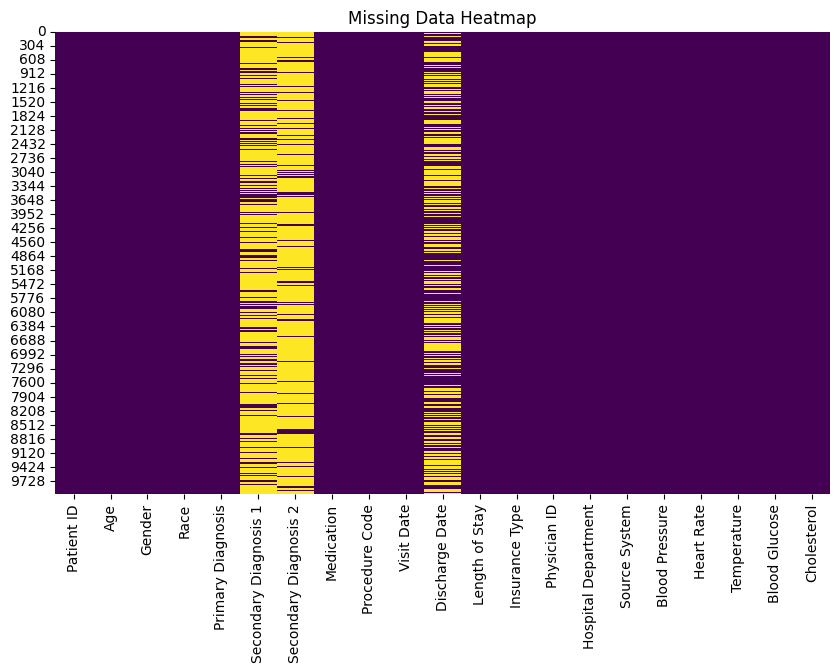

In [5]:
# visualize missing data with a heatmap.
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [6]:
# Check for duplicates
print("\nNumber of duplicate rows:")
print(df.duplicated().sum())


Number of duplicate rows:
0


In [7]:
# remove duplicate data
df = df.drop_duplicates()

# **Lets explore the numerical features.**

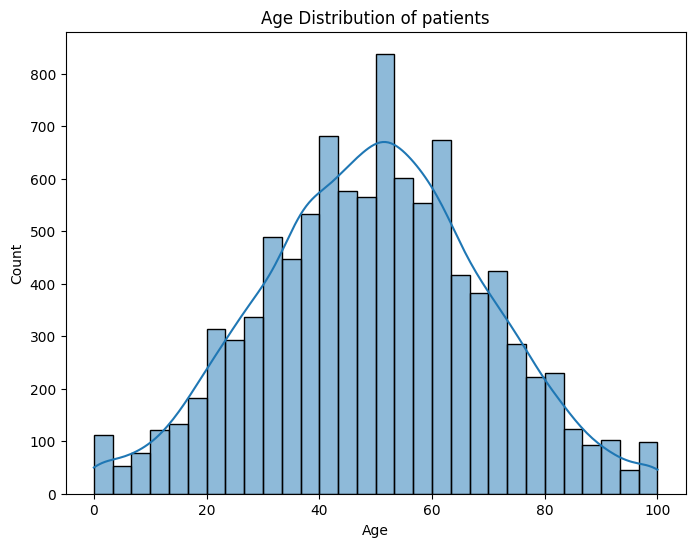

In [8]:
# visualize the Age Distribution of patients.
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution of patients')
plt.show()

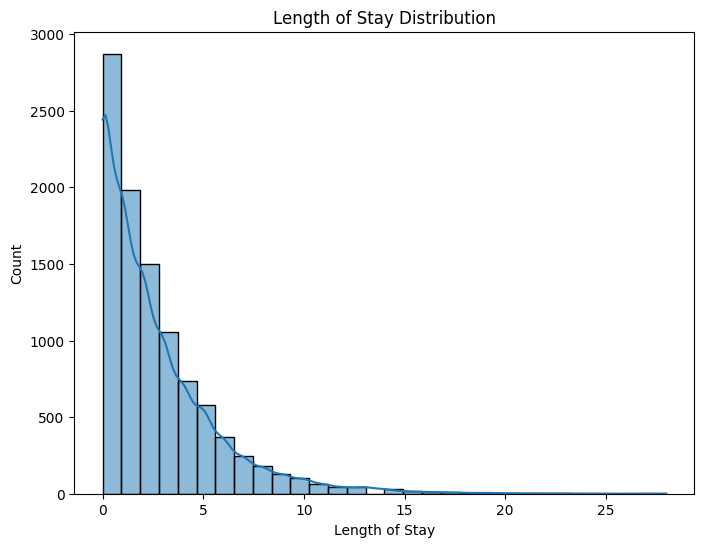

In [9]:
# Length of Stay Distribution.
plt.figure(figsize=(8, 6))
sns.histplot(df['Length of Stay'].dropna(), bins=30, kde=True)
plt.title('Length of Stay Distribution')
plt.show()


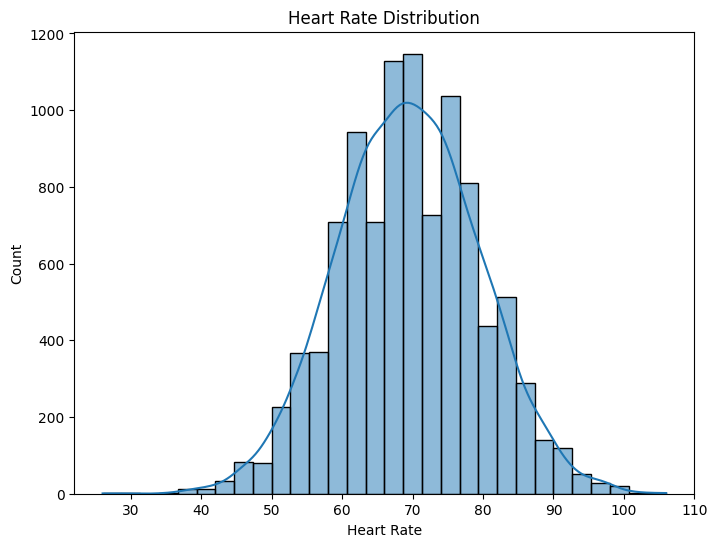

In [10]:
# Heart Rate Distribution.
plt.figure(figsize=(8, 6))
sns.histplot(df['Heart Rate'].dropna(), bins=30, kde=True)
plt.title('Heart Rate Distribution')
plt.show()

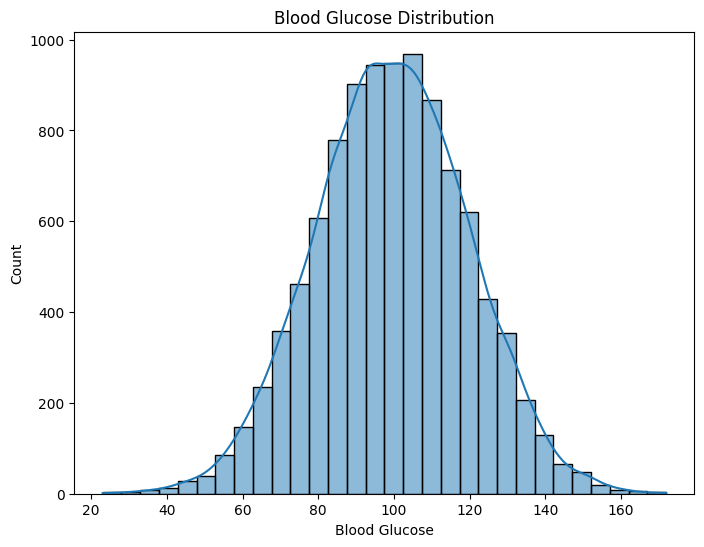

In [11]:
# Blood Glucose Distribution.
plt.figure(figsize=(8, 6))
sns.histplot(df['Blood Glucose'].dropna(), bins=30, kde=True)
plt.title('Blood Glucose Distribution')
plt.show()

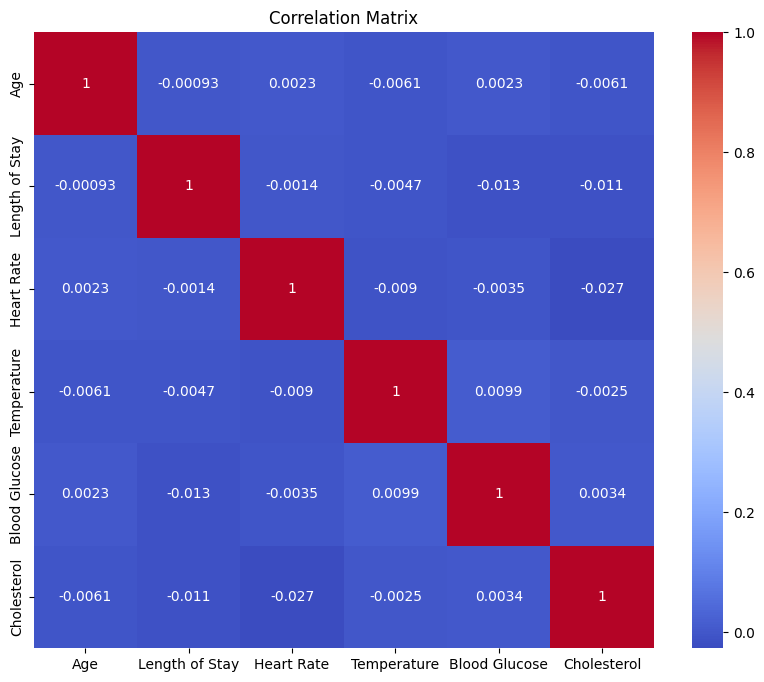

In [12]:
# Correlation matrix numerical features.
plt.figure(figsize=(10, 8))
correlation_matrix = df[['Age', 'Length of Stay', 'Heart Rate', 'Temperature', 'Blood Glucose', 'Cholesterol']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# **Now we explore the categorical features.**

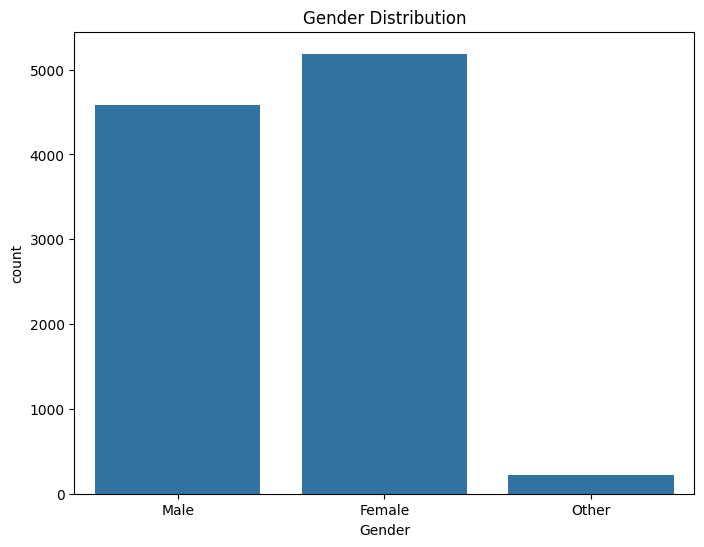

In [13]:
# Gender Distribution.
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

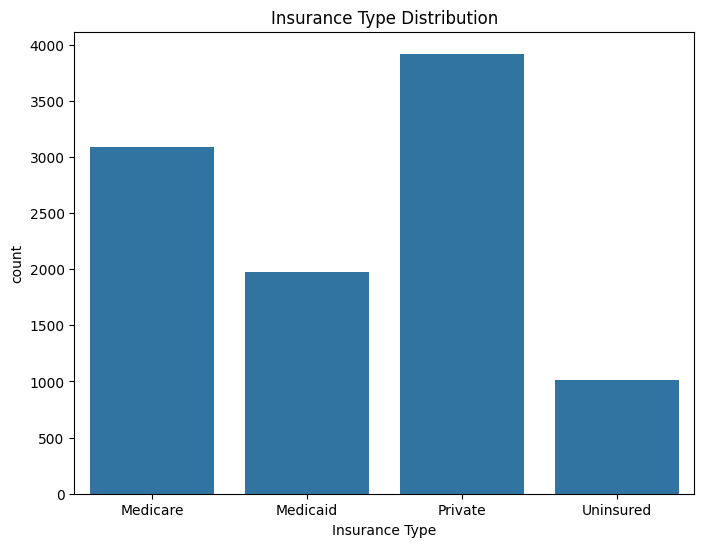

In [14]:
# Insurance Type Distribution.
plt.figure(figsize=(8, 6))
sns.countplot(x='Insurance Type', data=df)
plt.title('Insurance Type Distribution')
plt.show()

In [15]:
# Analyzing typos or inconsistencies in categorical data.
print("\nUnique values in 'Gender' column:")
print(df['Gender'].unique())

print("\nUnique values in 'Race' column:")
print(df['Race'].unique())


Unique values in 'Gender' column:
['Male' 'Female' 'Other']

Unique values in 'Race' column:
['White' 'Other' 'Asian' 'Black or African American' 'Hispanic or Latino']
